In [203]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


### 1. Data Collection

In [3]:
stats = pd.read_csv(r"/Users/ronnierfranz28/Downloads/avocado.csv")
stats.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 2. Data Cleaning and Pre-Processing

In [4]:
stats.reset_index(drop = True, inplace = True)

In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
stats.isnull().any()  #Check if there are any missing value in the columns

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [176]:
stats.columns = stats.columns.str.title()  # Capitalize the First Letter Of The Title of the Columns

In [180]:
stats["Date"] = pd.to_datetime(stats["Date"]) # Convert Date Column to a DateTime64 Format

In [178]:
stats.columns   

Index(['Unnamed: 0', 'Date', 'Averageprice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'Xlarge Bags', 'Type',
       'Year', 'Region'],
      dtype='object')

In [202]:
data = stats[['Date', 'Averageprice', 'Total Volume', '4046', '4225',       # Select the necessary columns
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'Xlarge Bags', 'Type', 'Region']]  


### 3. Data Analysis and Visualization (Exploratory Data Analysis)

In [101]:
data

,Date,Averageprice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,Xlarge Bags,Type,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


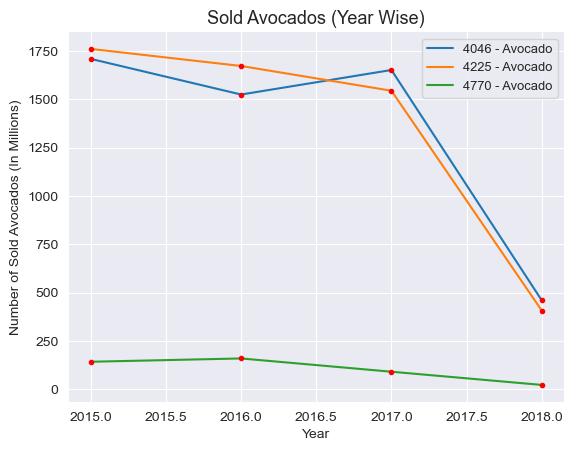

In [167]:
yearly_sold_avocados = data.groupby(data["Date"].dt.year)[["4046", "4225", "4770"]].sum()

sns.set_style("darkgrid")

fig, ax = plt.subplots()

ax.plot(yearly_sold_avocados.index, yearly_sold_avocados.loc[:, "4046":] / 1000000)
ax.plot(yearly_sold_avocados.index, yearly_sold_avocados.loc[:, "4046":] / 1000000, 'o', markersize = 3, color = "red")
ax.legend(["4046 - Avocado", "4225 - Avocado", "4770 - Avocado"], bbox_to_anchor = (0.7,1), fontsize = 9.3)
ax.set_title("Sold Avocados (Year Wise)", fontsize = 13)
ax.set_ylabel("Number of Sold Avocados (In Millions)")
ax.set_xlabel("Year")
ax.spines[["right", "top"]].set_visible(False)

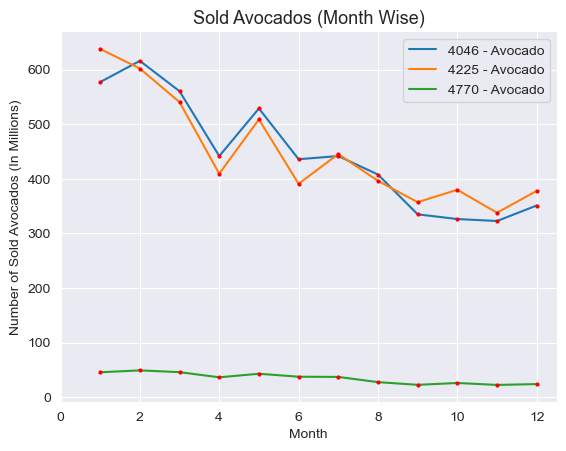

In [183]:
monthly_sold_avocados = data.groupby(data["Date"].dt.month)[["4046", "4225", "4770"]].sum()
monthly_sold_avocados

sns.set_style("darkgrid")

fig, ax = plt.subplots()
ax.plot(monthly_sold_avocados.index, monthly_sold_avocados.loc[:, "4046":] / 1000000)
ax.plot(monthly_sold_avocados.index, monthly_sold_avocados.loc[:, "4046":] / 1000000, 'o', markersize = 2, color = "red")
ax.legend(["4046 - Avocado", "4225 - Avocado", "4770 - Avocado"], bbox_to_anchor = (1,1))
ax.set_title("Sold Avocados (Month Wise)", fontsize = 13)
ax.set_ylabel("Number of Sold Avocados (In Millions)")
ax.set_xlabel("Month")
ax.spines[["right", "top"]].set_visible(False)
ax.set_xlim(0, 12.5);

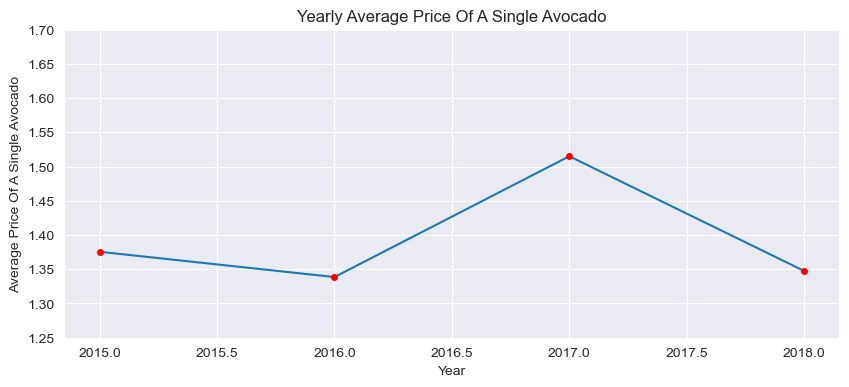

In [172]:
price1 = data.groupby("Date")[["Averageprice"]].mean()
price1 = price1.groupby(price1.index.year).mean()
price1

fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(price1.index, price1["Averageprice"]);
ax.plot(price1.index, price1["Averageprice"], 'o', markersize = 4, color = "red");
ax.set_ylim(1.25, 1.7);
ax.spines[["right", "top"]].set_visible(False);
ax.set_xlabel("Year");
ax.set_ylabel("Average Price Of A Single Avocado");
ax.set_title("Yearly Average Price Of A Single Avocado");

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


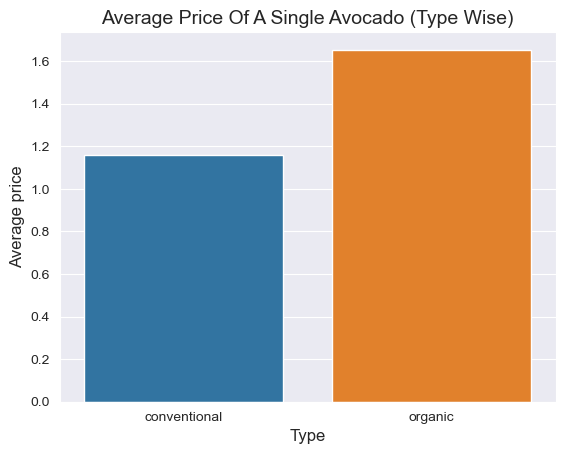

In [200]:
type_price = data.groupby("Type")[["Averageprice"]].mean().reset_index()
type_price = type_price.groupby("Type")[["Averageprice"]].sum().reset_index()
type_price


fig, ax = plt.subplots()
sns.barplot(data = type_price, x = type_price["Type"], y = type_price["Averageprice"]);
ax.set_title("Average Price Of A Single Avocado (Type Wise)", fontsize = 14);
ax.set_ylabel("Average price", fontsize = 12);
ax.set_xlabel("Type", fontsize = 12);


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

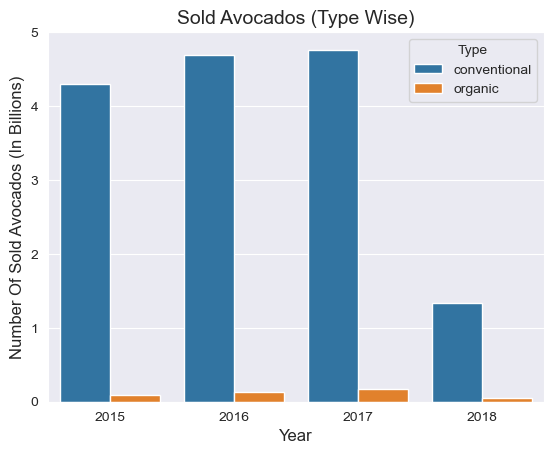

In [201]:
type = data.groupby(["Date", "Type"])[["Total Volume"]].sum().reset_index()
type = type.groupby([type["Date"].dt.year, "Type"])[["Total Volume"]].sum().reset_index()
type

fig, ax = plt.subplots()
sns.barplot(data = type, x = type["Date"], y = type["Total Volume"]/1000000000, hue = type["Type"]);
ax.set_title("Sold Avocados (Type Wise)", fontsize = 14);
ax.set_ylabel("Number Of Sold Avocados (In Billions)", fontsize = 12);
ax.set_xlabel("Year", fontsize = 12);

In [174]:
data.head()

,Date,Averageprice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,Xlarge Bags,Type,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0.5, 1.0, 'Lowest Prices of Avocado (Region Wise)')

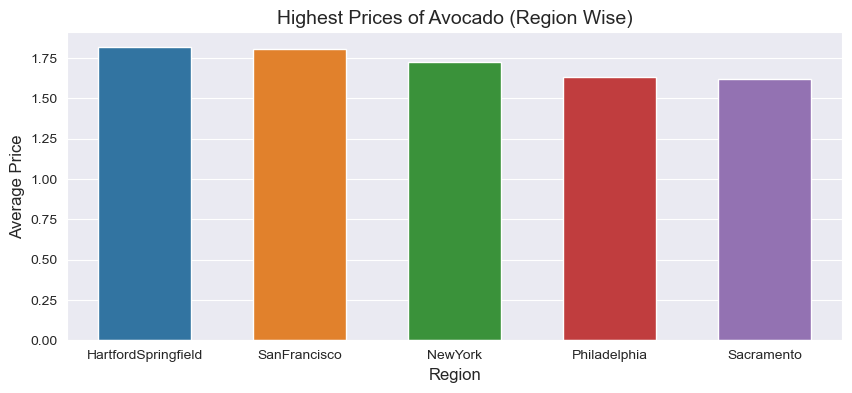

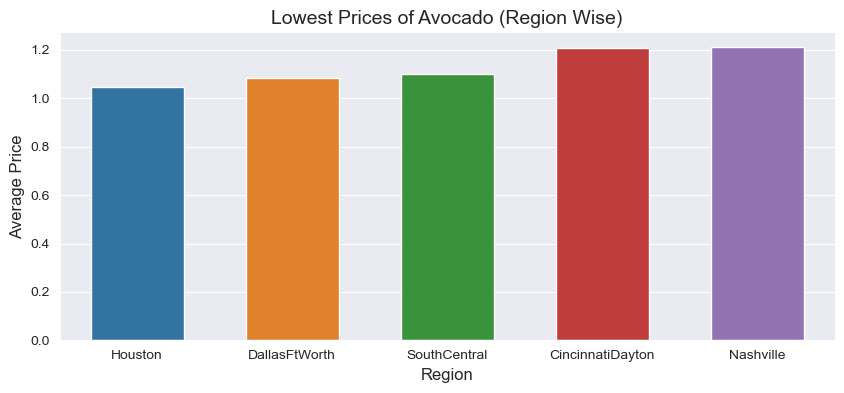

In [188]:
region_top_price = data.groupby("Region")[["Averageprice"]].mean().reset_index().sort_values(by="Averageprice", ascending = False).head()
region_top_price

fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(x=region_top_price["Region"], y=region_top_price["Averageprice"], data=region_top_price, width = 0.6)
ax.set_xlabel("Region", fontsize = 12)
ax.set_ylabel("Average Price", fontsize = 12)
ax.set_title("Highest Prices of Avocado (Region Wise)", fontsize = 14)


region_low_price = data.groupby("Region")[["Averageprice"]].mean().reset_index().sort_values(by="Averageprice", ascending = True).head()
region_low_price


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(x=region_low_price["Region"], y=region_low_price["Averageprice"], data=region_low_price, width = 0.6)
ax.set_xlabel("Region", fontsize = 12)
ax.set_ylabel("Average Price", fontsize = 12)
ax.set_title("Lowest Prices of Avocado (Region Wise)", fontsize = 14)

### 4. Conclusion 
####         There is a decrease in demand of Avocados from year 2015-2018. Avocados PLU 4046 and PLU 4225 was sold more than the PLU 4770. In year 2017, a drought happened in California that brought the price of avocado to increase dramatically. Conventional Avocados was sold more than the Organic because of the difference in their price. For the region, houston has the lowest selling price of avocado and HartfordSpringfield has the highest selling price. 